In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 We will first examine the contents of the file to understand its structure. Afterward, we'll assess various aspects such as accuracy, confidence levels, distribution of confidence scores, and the model's consistency in identifying dataset mentions. Let's start by inspecting the file to understand its structure and contents.

In [2]:
PATH = "/Users/jamesliounis/Documents/Projects/World Bank/NLP Project/data-use/data/annotated/databert_v1_ranked_pwrp.xlsx"

data = pd.read_excel(PATH)
data.head()

,sentence,DataBERT_class,DataBERT_confidence,DataBERT_confidence_rank,Comments,Unnamed: 5
0,"Second, the benefits of connectivity to young ...",Does not contain dataset mention,1.0,1,NaN,NaN
1,"Tracking the evolution of impact , and cumulat...",Does not contain dataset mention,1.0,1,NaN,NaN
2,∅𝑖𝑖 is a vector of \ndistrict and state fixed ...,Does not contain dataset mention,1.0,1,NaN,NaN
3,"T he sample comprises 1,188 observations.",Does not contain dataset mention,1.0,1,NaN,NaN
4,"For \nparsimony, we drop the lagged dependent ...",Does not contain dataset mention,1.0,1,NaN,NaN


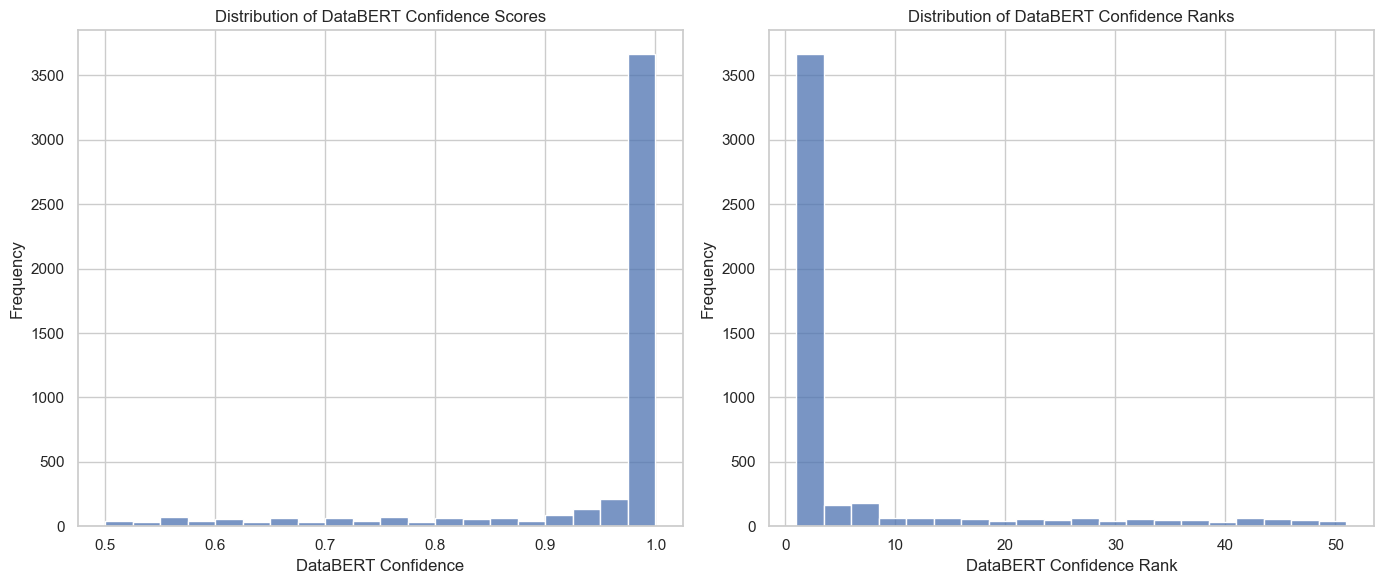

In [3]:
# Set the visual style for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of DataBERT confidence scores
sns.histplot(data['DataBERT_confidence'], kde=False, ax=ax[0], bins=20)
ax[0].set_title('Distribution of DataBERT Confidence Scores')
ax[0].set_xlabel('DataBERT Confidence')
ax[0].set_ylabel('Frequency')

# Plot the distribution of DataBERT confidence ranks
sns.histplot(data['DataBERT_confidence_rank'], kde=False, ax=ax[1], bins=20)
ax[1].set_title('Distribution of DataBERT Confidence Ranks')
ax[1].set_xlabel('DataBERT Confidence Rank')
ax[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


## Confidence score by classification

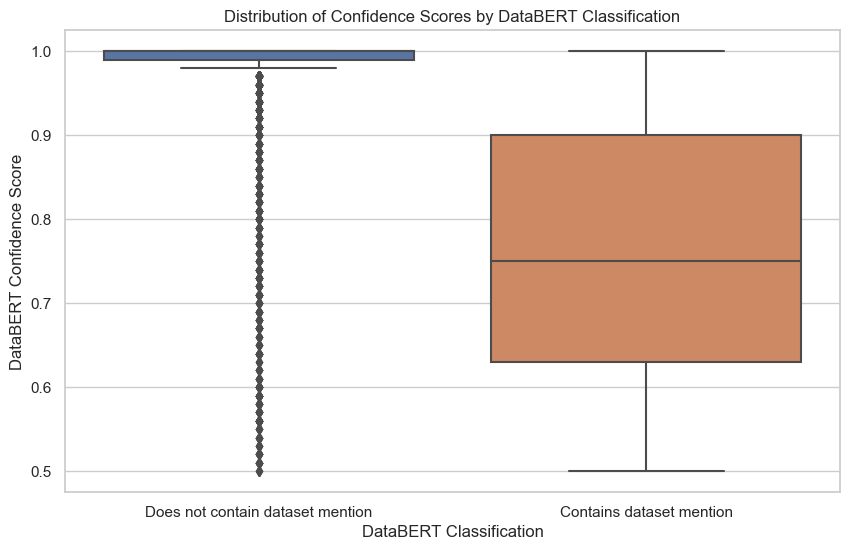

In [4]:
# Create a boxplot to compare the distribution of confidence scores for the two classifications
plt.figure(figsize=(10, 6))
sns.boxplot(x='DataBERT_class', y='DataBERT_confidence', data=data)
plt.title('Distribution of Confidence Scores by DataBERT Classification')
plt.xlabel('DataBERT Classification')
plt.ylabel('DataBERT Confidence Score')
plt.show()


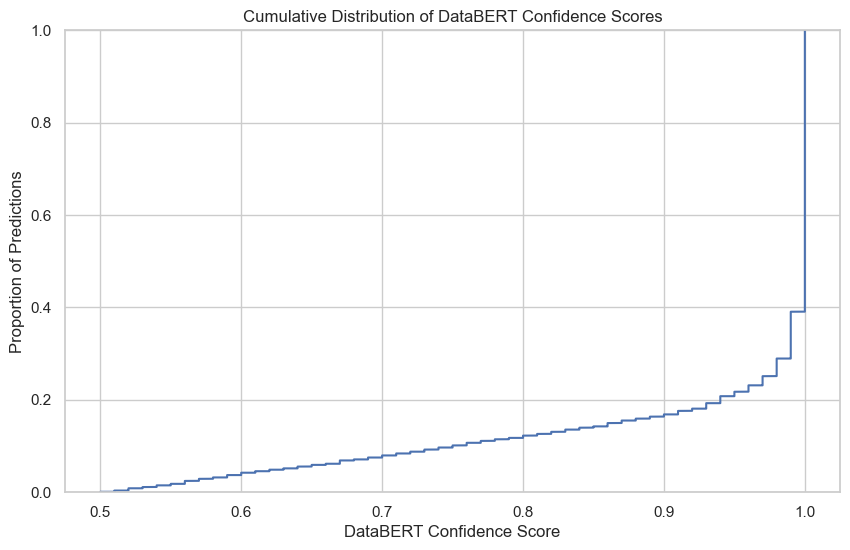

In [5]:
# Create a Cumulative Distribution Function (CDF) plot for confidence scores
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=data, x='DataBERT_confidence')
plt.title('Cumulative Distribution of DataBERT Confidence Scores')
plt.xlabel('DataBERT Confidence Score')
plt.ylabel('Proportion of Predictions')
plt.grid(True)
plt.show()


## Does sentence length matter?

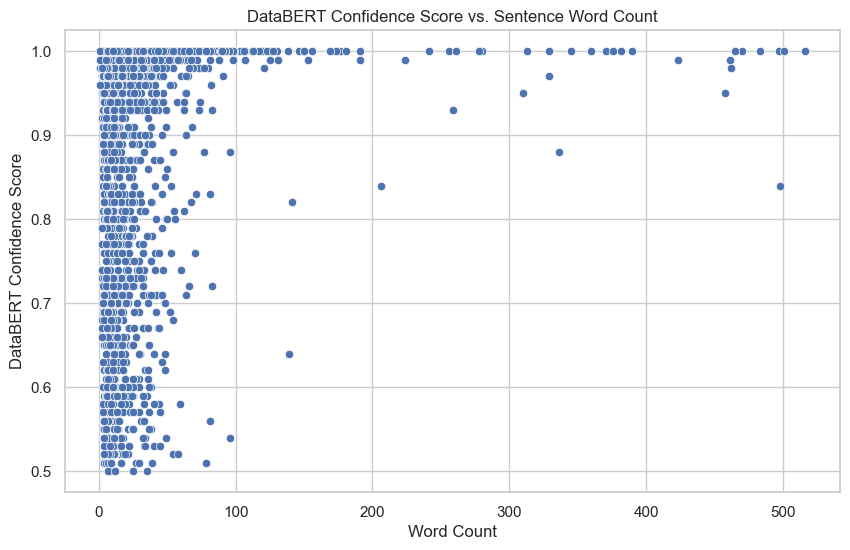

In [6]:
# Calculate the word count for each sentence
data['word_count'] = data['sentence'].apply(lambda x: len(x.split()))

# Create a scatter plot to visualize the relationship between word count and confidence score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='DataBERT_confidence', data=data)
plt.title('DataBERT Confidence Score vs. Sentence Word Count')
plt.xlabel('Word Count')
plt.ylabel('DataBERT Confidence Score')
plt.grid(True)
plt.show()


# Analysing performance across ranks

In [50]:
data.query('DataBERT_confidence_rank == 35 and DataBERT_class == "Contains dataset mention"')

,sentence,DataBERT_class,DataBERT_confidence,DataBERT_confidence_rank,Comments,Unnamed: 5,word_count
4594,(2016) “The Role o f Information i n Innovatio...,Contains dataset mention,0.66,35,NaN,NaN,27
4595,Healthcare associated infection and its risk f...,Contains dataset mention,0.66,35,NaN,NaN,18
4597,“Gender and firm performance \naround the worl...,Contains dataset mention,0.66,35,NaN,NaN,20
4599,(2012) and Blanchflower et al.,Contains dataset mention,0.66,35,NaN,NaN,5
4601,"World Governance Indicators by region, 2000 -2...",Contains dataset mention,0.66,35,NaN,NaN,14
4604,\nOECD (2018).,Contains dataset mention,0.66,35,NaN,NaN,2
4605,"Licence: CC BY -NC-SA \n3.0 IGO \nYallew WW, K...",Contains dataset mention,0.66,35,NaN,NaN,13


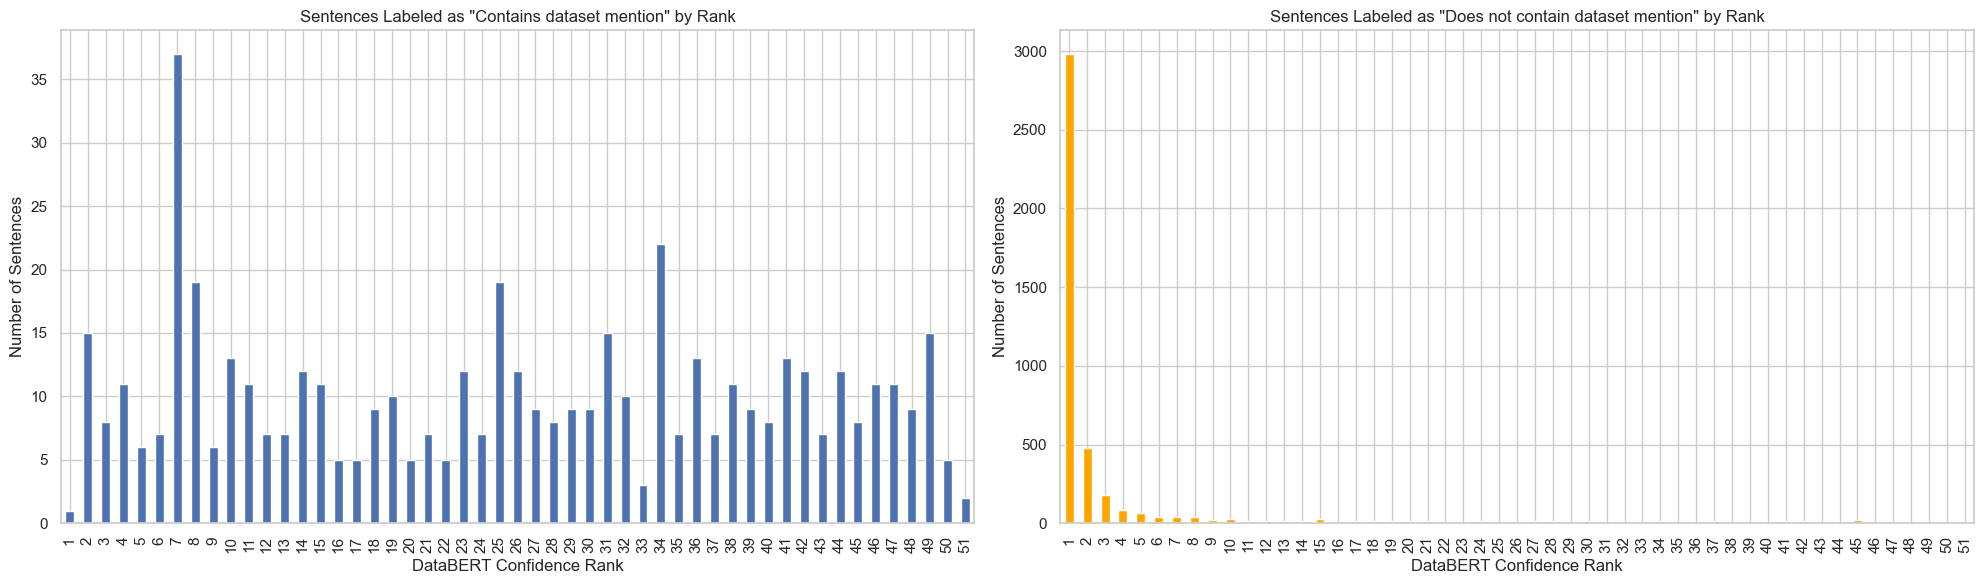

In [54]:
# Filter for entries with "Contains dataset mention"
contains_dataset_mention = data[data['DataBERT_class'] == "Contains dataset mention"]
contains_dataset_counts = contains_dataset_mention.groupby('DataBERT_confidence_rank').size()

# Filter for entries with "Does not contain dataset mention"
does_not_contain = data[data['DataBERT_class'] == "Does not contain dataset mention"]
does_not_contain_counts = does_not_contain.groupby('DataBERT_confidence_rank').size()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot for "Contains dataset mention"
contains_dataset_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('Sentences Labeled as "Contains dataset mention" by Rank')
axs[0].set_xlabel('DataBERT Confidence Rank')
axs[0].set_ylabel('Number of Sentences')

# Plot for "Does not contain dataset mention"
does_not_contain_counts.plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('Sentences Labeled as "Does not contain dataset mention" by Rank')
axs[1].set_xlabel('DataBERT Confidence Rank')
axs[1].set_ylabel('Number of Sentences')

plt.tight_layout()
plt.show()


# Insights from DatastilBERT: v2.0

In [3]:
PATH = "/Users/jamesliounis/Documents/Projects/World Bank/NLP Project/data-use/data/annotated/PWRP_annotated_DatastilBERT_v2.xlsx"

df = pd.read_excel(PATH)
df.head()

,sentence,id,last_modified_date,authors,count,count_key,docna,docty,docty_key,owner,...,subsc,theme,prdln,prdln_key,projectid,trustfund,trustfund_key,has_data,DataBERT_classification,DatastilBERT_v2_classification
0,['Policy Research Working Paper 10704\nWhat Li...,34258623,2024-02-14T00:00:00Z,"{'0': {'author': 'Rama,Martin G.'}, '1': {'aut...",World,517191,{'0': {'docna': 'What Lies Behind “Good” Analy...,Policy Research Working Paper,620265,Office of the Vice President (OPSVP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Does not contain dataset mention,"('Does not contain dataset mention', 0.9092611...","[{'label': 'WITH_DATA', 'score': 0.80110180377..."
1,An objective of the series is to get the findi...,34258623,2024-02-14T00:00:00Z,"{'0': {'author': 'Rama,Martin G.'}, '1': {'aut...",World,517191,{'0': {'docna': 'What Lies Behind “Good” Analy...,Policy Research Working Paper,620265,Office of the Vice President (OPSVP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Does not contain dataset mention,"('Does not contain dataset mention', 0.9985073...","[{'label': 'NO_DATA', 'score': 0.8661810159683..."
2,The papers carry the \nnames of the authors an...,34258623,2024-02-14T00:00:00Z,"{'0': {'author': 'Rama,Martin G.'}, '1': {'aut...",World,517191,{'0': {'docna': 'What Lies Behind “Good” Analy...,Policy Research Working Paper,620265,Office of the Vice President (OPSVP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Contains dataset mention,"('Contains dataset mention', 0.7614002823829651)","[{'label': 'NO_DATA', 'score': 0.8121635913848..."
3,"The findings, interpretations, and conclusions...",34258623,2024-02-14T00:00:00Z,"{'0': {'author': 'Rama,Martin G.'}, '1': {'aut...",World,517191,{'0': {'docna': 'What Lies Behind “Good” Analy...,Policy Research Working Paper,620265,Office of the Vice President (OPSVP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Does not contain dataset mention,"('Does not contain dataset mention', 0.5594068...","[{'label': 'NO_DATA', 'score': 0.7707554101943..."
4,They do not necessarily represent the views of...,34258623,2024-02-14T00:00:00Z,"{'0': {'author': 'Rama,Martin G.'}, '1': {'aut...",World,517191,{'0': {'docna': 'What Lies Behind “Good” Analy...,Policy Research Working Paper,620265,Office of the Vice President (OPSVP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Does not contain dataset mention,"('Does not contain dataset mention', 0.9964689...","[{'label': 'WITH_DATA', 'score': 0.56187266111..."


In [20]:
def extract_results(row):
    # Evaluate the string as a list containing a dictionary
    result = eval(row['DatastilBERT_v2_classification'])[0]
    return pd.Series([result['label'], result['score']])


df[['has_data', 'confidence']] = df.apply(extract_results, axis=1)

df['has_data'] = df['has_data'].apply(lambda x: 1 if x == "WITH_DATA" else 0)
df['confidence'] = df['confidence'].round(2)

df_pos = df.query("has_data == 1")
df_pos['rank'] = df_pos['confidence'].rank(ascending=False, method='dense')
df_pos['rank'] = df_pos['rank'].round(1)

df_pos = df_pos.sort_values(by='rank')

/var/folders/bn/mhzy3bp10bl99gcw6tpnkhcc0000gn/T/ipykernel_59310/1601660622.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['rank'] = df_pos['confidence'].rank(ascending=False, method='dense')
/var/folders/bn/mhzy3bp10bl99gcw6tpnkhcc0000gn/T/ipykernel_59310/1601660622.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['rank'] = df_pos['rank'].round(1)


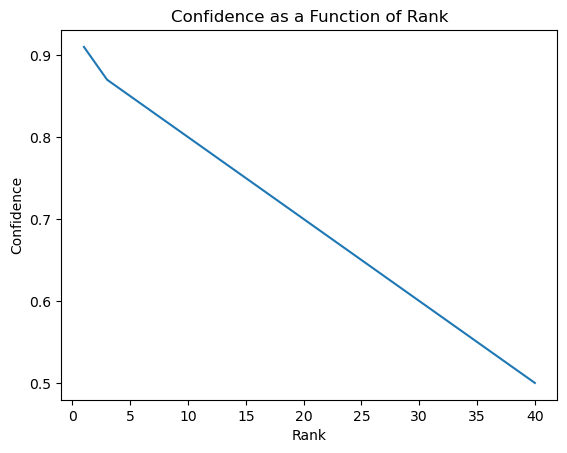

In [83]:
fig, ax = plt.subplots()
ax.set_title('Confidence as a Function of Rank')
ax.set_xlabel('Rank')
ax.set_ylabel('Confidence')
ax.plot(df_pos['rank'], df_pos['confidence'])
plt.show()

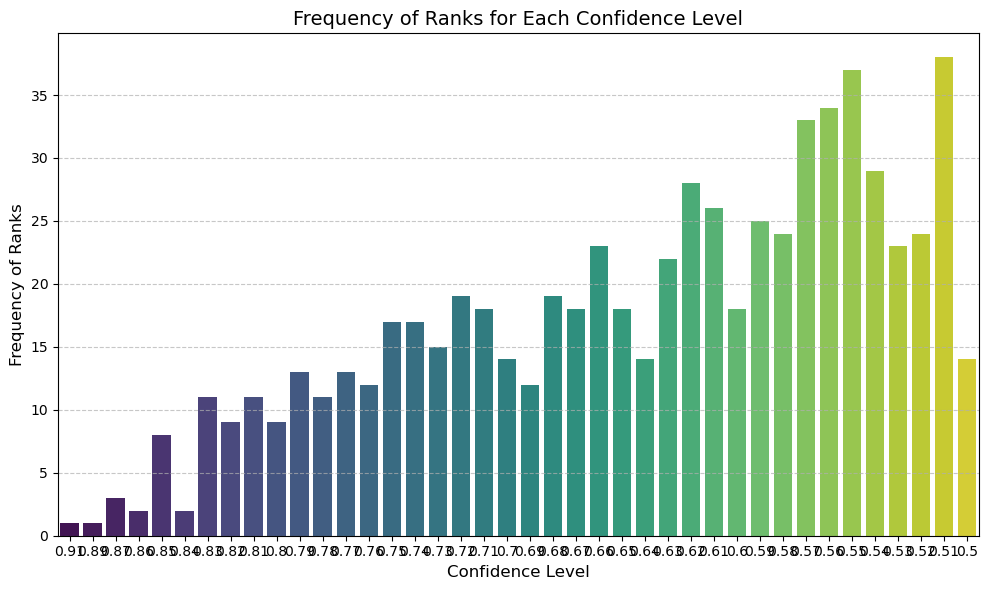

In [97]:
# Prepare the data
df_pos_sorted = df_pos.sort_values(by='confidence', ascending=False)
grouped_data = df_pos_sorted.groupby('confidence', sort=False)['rank'].count().reset_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Ensure the plot respects the sorted order by specifying 'order' parameter
order = grouped_data['confidence'].tolist()
sns.barplot(x='confidence', y='rank', data=grouped_data, palette='viridis', ax=ax, order=order)

# Customize the plot using the ax object to set titles and labels
ax.set_title('Frequency of Ranks for Each Confidence Level', fontsize=14)
ax.set_xlabel('Confidence Level', fontsize=12)
ax.set_ylabel('Frequency of Ranks', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [71]:
rank = 28
df_pos.query(f"rank =={rank}")['sentence'].to_list()

['\\nIn conclusion, the evidence presented above indicates significant variation in AMR rates across diff erent bacteria/viruses, across different first line drugs and across different \\ncountries and sub -regions.',
 'The Geography of Conflict in North and West Africa, West African Studies, OECD \\nPublish ing, Paris, https://doi.org/10.1787/02181039 -en\\n.',
 'This finding is broadly supported by the true \\nplant -level panel analysis: young plants above median human capital and higher capi tal intensity drive the \\naggregate growth response while those below show no response to GQ; and below median older plants drive the contraction of the cohort while above median plants show no decline.',
 'The total was scaled by \\nthe populat ion of the relevant region or count ry in 2019, using demographic data from  the United \\nNations (20 20).',
 "', '14 \\n In all, the  consolidated database used in this paper contain s 12,832 P-codes and 6,4 43 Z-codes , jointly  \\nrepresenting the 

## Analysis of Detection across different ranks

**Rank = 1**:

```bash
"\\n  POLICY RESEARCH         W\\nORKING PAPERSTRANSPARENT\\nANALYSIS', 'P\\nresumptive Tax  on Small and Micro enterprises with a Gender Lens in Ethiopia1 \\nHitomi Komatsua  \\nKeywords: Presumptive tax, taxation, gender, Ethiopia \\nJEL: H22, H25, J16 \\n1 This study was  supported by the World Bank’s Global Tax Program."
```

This sentence may very well be a False Positive. The issues here that may confuse the model are:
- The structure, with all the new line characters that splits up words
- This specific part of the sentence: "This study was  supported by the World Bank’s Global Tax Program."

In further iterations, we may want to consider "tricking" the model using similar sentences, for it to better distinguish various across various levels of vocabulary.

**Rank= 2, 3, 4, 5, 6**:

Perfect examples:

```bash
'T he study uses newly available data on household nonfarm enterprises  from the 2018/2019 and \\n2021/2022 Ethiopian Socioeconomic Survey s (ESS)  and the tax code to impute tax liabilities.'
'Using citation data from the Google Scholar platform , this study revealed  the heterogen eous quality of \\nthe research  products  selected.'
"Data description and main variables \\n3.1 Data sources  \\nOur primary data source consist s of firm -level survey data collected by the World Bank's \\nEnterprise Surveys ( WBES)."]
```

**Rank = 6, 7, 8, 9, 10, 11, 13**:

Still some good detections (from rank 11):

```bash
'Using data collected from\\n2,320 taxpayers for 2011 and 2012, the study uncovered valuable insights into\\nthe dynamics of the tax system.\\nThe findings suggest that while the tax policy itself is not explicitly bi-\\nased, gender disparities in tax declaration and enforcement processes have\\nemerged.'
```

Issues with bibliography or title detections:

```bash
'(2015) “Firm Dynamics, Productivity Growth, and Job Creation in Developing Countries: The Role of Micro- and Small Enterprises,” World Bank Research Observer,  30(1): 3 – 38 \\n Martin, L., S. Nataraj, S., and A. Harrison.'
'(2015b)  “A Detail ed Anatomy of Factor Misallocation \\nin India,” World Bank Policy Research Working Paper No.'
```

**Rank = 14, 15**:

Starts detecting "low-hanging fruit" that start with "Source":

```bash
'Protests and demonstrations in Africa  \\n    \\nSource:  Armed Conflict Location & Event Data Project (ACLED).'
```

**Rank = 16, 17, 18, 19, 20, 21, 22, 23, 24**:

Still some confusion with entity names:

```bash
'World Bank Policy Research Working Paper, (8065)'.
```

A lot of titles and references at this point, but still good examples. 


**Rank 25 onwards**:

30% correct. 









Queries:

- Are calculations using data considered data points? And mentions of statistical methodologies? e.g., elasticity...

New notes for guardrails:

- Paper titles
- References
- Sentences recurrent in papers e.g., 
```bash
"They do not necessarily represent the views of the International Bank for Reconstruction and Development"
```
-